# Continuação Keras 1

## Exploraremos os hiper parâmetros do algoritimo

Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


Exploração dos dados

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibição dos dados

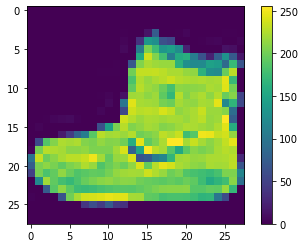

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [5]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [6]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 16s 10ms/step - loss: 0.5264 - accuracy: 0.8135 - val_loss: 0.4152 - val_accuracy: 0.8484
Epoch 2/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3992 - accuracy: 0.8564 - val_loss: 0.4057 - val_accuracy: 0.8498
Epoch 3/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3618 - accuracy: 0.8671 - val_loss: 0.3691 - val_accuracy: 0.8650
Epoch 4/5
1500/1500 [==============================] - 19s 13ms/step - loss: 0.3419 - accuracy: 0.8744 - val_loss: 0.3428 - val_accuracy: 0.8776
Epoch 5/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3263 - accuracy: 0.8787 - val_loss: 0.3315 - val_accuracy: 0.8764


Sumário do modelo

In [7]:
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Pesos da primeira camada Dense

In [8]:
pesos_camada_dense = modelo.layers[1].get_weights()
pesos_camada_dense

[array([[ 0.00375356, -0.05709529, -0.07207579, ..., -0.01314857,
         -0.06674816, -0.01193157],
        [ 0.08682433,  0.00897861,  0.06629181, ..., -0.04647704,
         -0.03082457, -0.01506548],
        [-0.09618962, -0.0264339 , -0.01616158, ...,  0.11104602,
         -0.0531414 , -0.08318856],
        ...,
        [ 0.10626113, -0.0707901 , -0.06004503, ..., -0.03825852,
          0.00814356, -0.03407433],
        [ 0.01808832, -0.00381197, -0.07409988, ..., -0.06308423,
         -0.03026395,  0.08819689],
        [ 0.07681488, -0.07996122, -0.04257478, ...,  0.01296767,
         -0.01053978,  0.07719038]], dtype=float32),
 array([ 0.27504408,  0.1961006 , -0.00401423,  0.27950415,  0.39078864,
         0.02807422,  0.21130852, -0.03409619,  0.10318842, -0.01165446,
         0.04600471,  0.23680167,  0.13955824, -0.01351769,  0.37839442,
         0.32012543,  0.14887467, -0.02757792,  0.14136304,  0.03599877,
         0.14201687,  0.21259269, -0.10355016, -0.01072869,  0.231

Salvando e carregando o modelo treinado

In [9]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácias de treino e validação por época

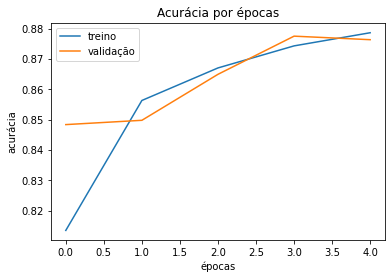

In [11]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


Visualizando as perdas de treino e validação por época

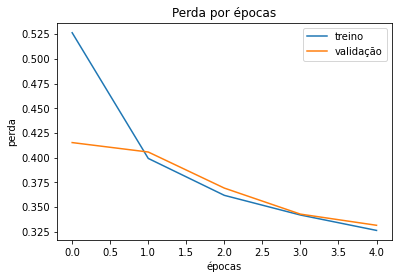

In [12]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [13]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

313/313 [==============================] - 1s 3ms/step
resultado teste: 2
número da imagem de teste: 2
313/313 [==============================] - 1s 4ms/step
resultado teste modelo salvo: 2
número da imagem de teste: 2


Avaliando o modelo

In [14]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 4ms/step - loss: 51.6256 - accuracy: 0.8616
Perda do teste: 51.62562942504883
Acurácia do teste: 0.8615999817848206
